In [1]:
import time
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
print(torch.__version__)

2.3.1


# Introduction to `tensors` in PyTorch

This notebook is the first in a series dedicated to **PyTorch**, one of the most popular *deep learning frameworks* used in both research and industry. PyTorch allows for the development and training of large neural networks and the implementation of other popular deep learning algorithms in a simple and efficient manner. Originally designed and used in-house by Meta, PyTorch later became open-source and is now used by many companies, including Microsoft and OpenAI. PyTorch not only provides methods for neural network implementation but also offers a complete framework based on `tensors` to efficiently perform linear algebra operations with GPU acceleration. In this notebook, we will focus specifically on the concept of tensors in PyTorch, which are the building blocks for any deep learning implementation.

## Scalars, Vectors, Matrices and Tensors

In mathematics, a *tensor* is a generalization of the concept of vector. There are many ways in which the concept can be introduced rigorously. For example, one approach is that of differential geometry, where a tensor is defined as a *collection of $N$ real numbers (coefficients) that possess a specific transformation law under a change of coordinates basis*. For example, "standard" vector $\boldsymbol{v}$ are collection of numbers $v_i$ identified by a single index $i$, with the following property: if coordinate basis are double, the vector components are halfed. This is why they are usually called **controvariant vectors**. However, this is a just one of the possibile definitions of tensors, which specifically rely on the introduction of a coordinate system; tensors can also be defined in a more abstract way, from the so-called *tensor product* of vector spaces. 

For our purposes, we do not need to delve deep into the abstract definitions of tensors or their transformations law. Indeed, in deep learning, it is sufficient to consider tensors as mere collections of real numbers, definined by some indices and that can be manipulated with specific algebraic operations. In particular, we have the following basic definitions:
- **scalar**: a scalar is a 0-dimensional tensor, i.e. a single real number $a$. We do not need to specify any index for this quantity, since a scalar is by definition just a single number. Clearly, scalar quantities are always **invariant** under any transformation law;
- **vector**: a vector is a 1-dimensional tensor, therefore its components are real numbers specified by a single (1) index $i$. In symbols, we write $\boldsymbol{v} = \{ v_i \}$;
- **matrix**: a matrix is 2-dimensional tensor, defined by two indices $i, j$, which refer to matrix *rows* and *columns*. In symbols, we will write $M_{ij}$ to refer to matrix elements. However, to be more precise, matrix are actually just a special case of **2-rank tensors**, whose components should be written as $A_i^j$, since rows and columns behaves differently under a change of coordinate basis;
- **tensor**: a high-dimensional generalization, where the tensor object is identified by $N$ indices, $n_1, n_2, n_3, ...$. In most of deep learning applications, one manipulates at most "3-dimensional" tensors, which can be rougly considered as collections of matrices. 

Below, let's see how we can defined `tensors` in PyTorch:

In [3]:
scalar = torch.tensor(10)
scalar

tensor(10)

In [4]:
# Find dimension
print(f"The scalar dimension is: {scalar.ndim}")

 The scalar dimension is: 0


In [5]:
# Get the tensor content
scalar.item()

10

In [6]:
# Defining a vector
vector = torch.tensor([10, 10])
vector

tensor([10, 10])

In [8]:
# one dimension!
print(f"The vector dimension is: {vector.ndim}")
print(f"The shape of the vector is the number of components: {vector.shape}")

The vector dimension is: 1
The shape of the vector is the number of components: torch.Size([2])


Notice that the **tensor dimension corresponds to the number of square brackets!**

In [9]:
# MATRIX
MATRIX = torch.tensor([[7, 8],
                       [10,10]])
MATRIX

tensor([[ 7,  8],
        [10, 10]])

In [11]:
print(f"The matrix dimension is: {MATRIX.ndim}")
print(f"The matrix shape is: {MATRIX.shape}")

The matrix dimension is: 2
The matrix shape is: torch.Size([2, 2])


In [12]:
# Access to rows and columns like for NumPy arrays
MATRIX[0], MATRIX[:,0]

(tensor([7, 8]), tensor([ 7, 10]))

In [13]:
# TENSOR
TENSOR = torch.tensor([[[1, 5, 10],
                        [6, 6, 6],
                        [2, 5, 5]]])
TENSOR

tensor([[[ 1,  5, 10],
         [ 6,  6,  6],
         [ 2,  5,  5]]])

In [14]:
# The zero-th dimension is 1
print(f"The tensor dimension is: {TENSOR.ndim}")
print(f"The tensor shape is: {TENSOR.shape}")

The tensor dimension is: 3
The tensor shape is: torch.Size([1, 3, 3])


In this case we have defiend a tensor of size 1x3x3. In other words, we have a collection which consists of a single matrix, of dimension 3x3. We can "subset" the first matrix only, using index selection:

In [15]:
# Notice this:
TENSOR[0]

tensor([[ 1,  5, 10],
        [ 6,  6,  6],
        [ 2,  5,  5]])

Here, we look for each element in the first matrix, but selecting just the second (1, remind the 0-indexing) element of the second tensor component, i.e. the second row of the matrix:

In [16]:
TENSOR[:, 1]

tensor([[6, 6, 6]])

In [17]:
# Extracing third (2) columns of the matrix
TENSOR[:,:,2]

tensor([[10,  6,  5]])

Generally, in deep learning, uppercase are used for tensors and matrices. In the following, we will still lowercase, since we are just illustrating basic concepts about PyTorch tensors.

## Random Tensors

When working with deep learning algorithms, the first steps in optimization procedures general involve the assignment of **random** values to trainable parameters. Therefore, we need to introduce **random tensors**, i.e. tensors whose components are random numbers (actually *pseudo-random* numbers since computers cannot generate truly random objects). 

In [18]:
# We can create a random tensor of shape  (5,5)
random_tensor = torch.rand(5,5)
random_tensor

tensor([[1.6481e-01, 6.1411e-01, 6.2964e-01, 5.1307e-01, 2.7398e-01],
        [8.3616e-02, 8.2306e-01, 1.4806e-01, 3.5704e-02, 5.0896e-01],
        [9.0521e-01, 6.6282e-01, 8.2845e-01, 2.5487e-01, 8.0882e-01],
        [3.8571e-01, 4.3804e-01, 4.1729e-04, 1.6257e-01, 7.6605e-01],
        [5.2209e-01, 7.7641e-01, 7.3434e-01, 7.3032e-01, 3.6066e-01]])

For example, let create a random tensor represeting a *noisy image*, i.e. an image where each pixel is a random value. Normally images are represented as 224x224x3 tensors, where 224x224 represent the image dimension (i.e. width x height), while 3 refers to the three color channels (each pixel is specified by 3 numbers, the red, blu and green components):

In [19]:
# Create a random tensor with similar shape to an image tensor
random_image_tensor = torch.rand(size=(224, 224, 3))

# Print shape and dim
print(f"Tensor shape: {random_image_tensor.shape}")
print(f"Tensor dim: {random_image_tensor.ndim}")

Tensor shape: torch.Size([224, 224, 3])
Tensor dim: 3


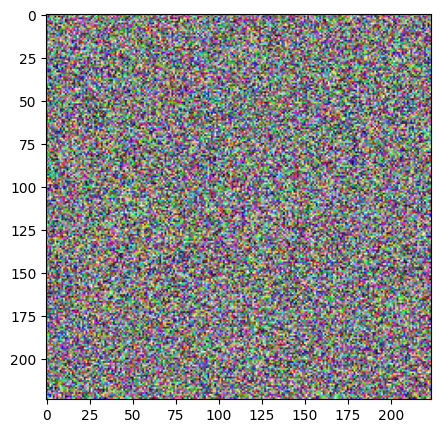

In [21]:
fig, ax = plt.subplots(figsize=(5,5))

# Plotting the noisy random mage
plt.imshow(random_image_tensor)

### Initiliazite tensors

When there is no need of random tensors, we can initialize them with 0 or 1 values. PyTorch, as Numpy, provides built-in methods to generate tensors filled with 0 or 1:

In [22]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(5,5))
zeros

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [23]:
# Make a tensor vanishing 
zeros*random_tensor

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [24]:
# Create a tensor of all ones
ones = torch.ones(size=(5,5))

In [25]:
ones

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

Notice that `torch.ones` create a tensor with datatype `float32`, which is the default datatype for tensors in PyTorch. So, we are not creating a tensor with integer 1 values!

In [27]:
print(f"Datatype of torch.ones tensors: {ones.dtype}")

Datatype of torch.ones tensors: torch.float32


We can also create a tensor with a range of values, using `torch.arange`:

In [28]:
#  Create a range of tensors and tensors-like
one_to_hun = torch.arange(start=0,end=110, step=10)

In [29]:
one_to_hun

tensor([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

Another useful methods is the `torc.zeros_like`, which initialize a tensor with 0 but "copying" the dimension of a given tensor:

In [30]:
# Creating tensors like
ten_zeros = torch.zeros_like(one_to_hun)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Tensor Datatypes

`torch.tensor` has three main arguments that we need to carefully explore and understand. These are:

1. `dtype`: specify the datatype, which is related to the precision of the numerical representations. The default is `float32`, which means that numbers are represented as 32-bits floating numbers. In other words, 32 bits of memory are used to store each number filling the tensor components. We need to pay attention to tensor datatypes, especially when manipulating them in algebraic operations, otherwise we may encounter numerical precision problems;
2. `device`: this is the device where tensors are stored. The default value is `cpu` but we may also set it to `cuda` even if we want to leverage the GPU acceleration. Remind that **we cannot perform operations between tensors stored on different devices!**
3. `requires_grad`: a boolean parameter telling PyTorch whether we want to track or not *gradients* (i.e. derivatives of tensor components). We will cover this topic in another notebook, when working with neural networks.

`device`and `requires_grad` introduce two main differences between `torch.tensor` objects and `np.ndarray`: indeed, the latter can be stored just on CPU and do not implicitly track gradients! That's why deep learning algorithms implementations generally rely on PyTorch tensors rather than Numpy arrays. 

In [32]:
# The default datatype is float32!
float_32_tensor = torch.tensor([1.0, 2.0, 3.0], dtype=None)

In [33]:
print(f"The default datatype is: {float_32_tensor.dtype}")

The default datatype is: torch.float32


In [34]:
float_16_tensor = torch.tensor([1.0, 2.0, 3.0], 
                               dtype=torch.float16,
                               device=None,
                               requires_grad=False)

In [35]:
float_16_tensor.dtype

torch.float16

In [36]:
tensor1_float16 = torch.tensor([1, 1, 1], dtype=torch.float16)
tensor1_float32 = torch.tensor([1, 1, 1])

In [37]:
# Summing tensors of different datatypes
tensor1_float16+tensor1_float32

tensor([2., 2., 2.], dtype=torch.float16)

When adding or multypling tensors of different datatypes, the resulting tensor has the "minor" datatype, i.e. that with the lowest numerical precision:

In [38]:
# Converting tensor datatypes
tensor1_converted = tensor1_float32.type(torch.float32)
tensor1_converted.dtype

torch.float32

In [39]:
tensor1_float16*tensor1_float32

tensor([1., 1., 1.], dtype=torch.float16)

In [40]:
# Summarizing tensor information
print(tensor1_float16)
print(f"Datatype of tensor: {tensor1_float16.dtype}")
print(f"Shape of tensor: {tensor1_float16.shape}")
print(f"Device tensor is on: {tensor1_float16.device}")
print(f"Size of the tensor is: {tensor1_float16.size()}")

tensor([1., 1., 1.], dtype=torch.float16)
Datatype of tensor: torch.float16
Shape of tensor: torch.Size([3])
Device tensor is on: cpu
Size of the tensor is: torch.Size([3])


## `Tensor` algebra

- **Addition/Multiplication by a Scalar**: we can add scalars to tensor or add two tensors of same dimensions. Namely, let $T$ be a 3-rank tensor and $a$ a scalar, then: $$\begin{gather} \{T_{ijk}\} + a = \{T_{ijk}+a\} \\ \{T_{ijk}\} \cdot a = \{T_{ijk}\cdot a\} \end{gather}$$ which can be clearly generalized to higher dimensions;
- **Element-Wise Multiplication**: also known as **Hadamard or Schur product**, it is a binary operation which takes two tensor of same dimensions and returns a tensor where each element is the multiplication of corresponding elements: $$\{ (T\odot T')_{ijk} \} = (T_{ijk})\cdot (T'_{ijk})$$
- **Matrix Multiplication**: the binary operation that given two matrix $A$ and $B'$ of size $n \times m$ and $m \times p$ respectively, produces a matrix $C$ of size $m \times p$ with elements: $$c_{ij} = \sum_k^m a_{ik}b_{kj} $$ One of the most common errors in deep learning arises from matrix multiplications handled incorrectly. Indeed, as we can see from the above formula, when multiplying two matrices we are computing the **dot product** between rows of one matrix and columns of the other matrix; therefore, the number of columns of the first matrix $A$ must match the number of rows of the second matrix $B$.

Let's see how the above operations are implemented in PyTorch.

In [41]:
# Create a tenso and add 10 to it
tensor = torch.tensor([1, 2, 3])
tensor + 100

tensor([101, 102, 103])

In [42]:
# Multiply by a scalar
tensor * 100

tensor([100, 200, 300])

In [43]:
# Divide or subtract  by a scalar
tensor / 2, tensor - 1

(tensor([0.5000, 1.0000, 1.5000]), tensor([0, 1, 2]))

In [44]:
# Using Built-in operations
tensor.add(2), tensor.mul(2), tensor.div(2), tensor.sub(2)

(tensor([3, 4, 5]),
 tensor([2, 4, 6]),
 tensor([0.5000, 1.0000, 1.5000]),
 tensor([-1,  0,  1]))

In [50]:
# The Hadamard Product
print(f"The Hadamard product between two tensor is: {tensor}, *, {tensor}")
print(f"The result is: {tensor * tensor}")

The Hadamard product between two tensor is: tensor([1, 2, 3]), *, tensor([1, 2, 3])
The result is: tensor([1, 4, 9])


In [51]:
# The matrix multiplication in this case is a sclar
print(f"Matrix multiplication: {torch.matmul(tensor, tensor)}")

Matrix multiplication: 14


Notice that in the element-wise multiplication, we have started from a vector of shape $3\times 1$, and we have obtained again a $3\times 1$ vector. Instead, in the matrix multiplication, we have multiplied a tensor $3 \times 1$ by itself. With the `torch.matmul` method, PyTorch takes the **transpose** of the first tensor to correctly compute the product. Indeed, the first tensor is transposed to give a $1\times 3$ tensor, so that the multiplicaton gives: $1 times 3$ @ $3 \times 1$ = $1\times 1$.

A direct implementation of the product would be the following:

In [52]:
%%time
value = 0
for i in range(len(tensor)):
    value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 1.6 ms, sys: 1.89 ms, total: 3.49 ms
Wall time: 2.25 ms


In [53]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 276 μs, sys: 109 μs, total: 385 μs
Wall time: 412 μs


tensor(14)

Look at how faster is the use of the built-in method `torch.matmul` w.r.t. to the direct implementation. Let's practice with some tensors:

In [54]:
torch.rand(1, 3, 3), torch.rand(1, 3, 3).shape

(tensor([[[0.0724, 0.7064, 0.6636],
          [0.5302, 0.7483, 0.6272],
          [0.3223, 0.5589, 0.9522]]]),
 torch.Size([1, 3, 3]))

In [55]:
torch.matmul(torch.rand(1, 3, 3), torch.rand(3, 3, 1))

tensor([[[0.3190],
         [0.4263],
         [0.2281]],

        [[0.7014],
         [0.9904],
         [0.6023]],

        [[1.0060],
         [1.1711],
         [0.6688]]])

In [56]:
tensor_A = torch.tensor([[1, 2],
                         [3,4],
                         [5, 6]])

tensor_B  = torch.tensor([[7,10],
                          [8, 11],
                          [9, 12]])

In [57]:
# If we try to multiply these tensors we will get an error!
#torch.matmul(tensor_A, tensor_B)

In [58]:
tensor_A.shape, tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

If we try to multiple the two tensors above, PyTorch raise an exception. This is because the two passed tensors are not the same and PyTorch does not apply the transpose arbitrarly to one of them. In this case, we need to fix the shape issue by ourselves, calling the `.T` method on one of the input tensor.

In [59]:
tensor_B.T.shape

torch.Size([2, 3])

In [60]:
tensor_B, tensor_B.T

(tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]),
 tensor([[ 7,  8,  9],
         [10, 11, 12]]))

In [61]:
# Now we can multiply tensors:
torch.matmul(tensor_A, tensor_B.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

## Aggregations: `min`, `max`, `mean` and `sum`

In [56]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [57]:
# Find the min, max
torch.min(x), x.min()
torch.max(x), x.max()

(tensor(90), tensor(90))

If we try `torch.mean(x)` right now we would get an errore because the datatype of `x` is LongInt. Instead, we need a float datatype tensor to compute means!

In [58]:
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [59]:
torch.sum(x), x.sum()

(tensor(450), tensor(450))

In [60]:
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [61]:
x.argmin(), x.argmax()

(tensor(0), tensor(9))

### Reshaping, Stacking, Squeezing and Unsqueezing

- Reshaping : reshapes an input tensor to a defined shape
- View: return a view of an input tensor of certain shape but keep the same memory as the original tensor
- Stacking: combine multiple tensor on top of each other (vstack, hstack)
- Squeeze : removes all `1` dimensions from a tensor
- Unsqueeze : add a `1` dimension to a target tensor
- Permute: return a view of the input with dimensons permuted (swapped) in a certain way

In [62]:
y = torch.arange(1., 10.)

In [63]:
y, y.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [64]:
# add an extra dimension
y_reshaped = y.reshape(3, 3)
y_reshaped

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [65]:
# Change the view
z  = y.view(1, 9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

With view, the two tensors share the same memory space. Therefore, changing `z` will change also `y`:

In [66]:
z[:, 0] = 5

In [67]:
z, y

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [68]:
# Stack tensors
y_stacked =  torch.stack([x, x])

In [69]:
y_stacked, y_stacked.shape

(tensor([[ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
         [ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]]),
 torch.Size([2, 10]))

In [70]:
y_stacked_dim1 =  torch.stack([x, x], dim=1)

In [71]:
y_stacked_dim1, y_stacked_dim1.shape

(tensor([[ 0,  0],
         [10, 10],
         [20, 20],
         [30, 30],
         [40, 40],
         [50, 50],
         [60, 60],
         [70, 70],
         [80, 80],
         [90, 90]]),
 torch.Size([10, 2]))

In [72]:
# Squeeze and Unsqueeze
w = torch.tensor([2, 2])

In [73]:
w.shape

torch.Size([2])

In [74]:
w_squeezed = w.squeeze()

In [75]:
w_squeezed.shape

torch.Size([2])

In [76]:
u = torch.tensor([[2, 2]])
u.shape

torch.Size([1, 2])

In [77]:
u_squeezed = u.squeeze()
u_squeezed, u_squeezed.shape

(tensor([2, 2]), torch.Size([2]))

In [78]:
u_unsqueezed = u_squeezed.unsqueeze(dim=0)
u_unsqueezed, u_unsqueezed.shape

(tensor([[2, 2]]), torch.Size([1, 2]))

In [79]:
# permute: returns a view of the original tensor 
z = torch.randn(size=(224, 224, 3))
z.size()

torch.Size([224, 224, 3])

In [80]:
# Permute to rearrange axis (or dim) order, putting the color channel as the first dimension
z_permuted = z.permute(2, 0, 1)

In [81]:
z_permuted.shape

torch.Size([3, 224, 224])

## Indexing

Indexing in PyTorch is very similar to indexing in NumPy.

In [82]:
x = torch.arange(1, 10).reshape(1, 3, 3)

In [83]:
# Let'reshape it
x

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [84]:
# Index -> we are taking the "first bracket"
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [85]:
# We are taking the first bracket of the first outermost bracket, i.e. the first row 
# of the first matrix
x[0, 0]

tensor([1, 2, 3])

In [86]:
x[0, 0, 0], x[0, 0, 1], x[0, 0, 2]

(tensor(1), tensor(2), tensor(3))

In [87]:
# Select "all" of a target dimension
x[0, :, 2], x[0, 1, :]

(tensor([3, 6, 9]), tensor([4, 5, 6]))

### PyTorch vs NumPy

In [88]:
# Convert numpy array to tensor and viceversa
np_arr = np.arange(1.0, 8.0)
np_arr

array([1., 2., 3., 4., 5., 6., 7.])

In [89]:
tensor_from_np = torch.from_numpy(np_arr)

In [90]:
tensor_from_np

tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64)

Notice that the default for NumPy array is `float64`; when converting to PyTorch tensor, PyTorch preserves the datatype. 

In [91]:
# Get back
np_from_tensor = tensor_from_np.numpy()
np_from_tensor

array([1., 2., 3., 4., 5., 6., 7.])

In [92]:
np_from_tensor.dtype

dtype('float64')

Notice that numpy created from tensors and viceversa do not share the same memory, so actions performed on the tensor will not be reflected on the numpy array and viceversa.

## Reproducibility

Neural Networks training generally starts with random numbers assignments to parameters. To make the experiments reproducibile, we want to reduce the randomness by setting a **random seed**, which "flavour" the randomness. 

In [93]:
random1 = torch.rand(3, 4)
random2 = torch.rand(3, 4)

In [94]:
random1, random2, random1==random2

(tensor([[0.4369, 0.1766, 0.7275, 0.7775],
         [0.4674, 0.9213, 0.8787, 0.9163],
         [0.4251, 0.1053, 0.0334, 0.1197]]),
 tensor([[0.6035, 0.9295, 0.2557, 0.5043],
         [0.1766, 0.5210, 0.7082, 0.8943],
         [0.0422, 0.8518, 0.1364, 0.2636]]),
 tensor([[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]]))

In [95]:
# Set a random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random3 = torch.rand(3, 4)

In [96]:
torch.manual_seed(RANDOM_SEED)
random4 = torch.rand(3, 4)

In [97]:
random3 == random4

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

Notice that we need to set the manual seed everytime we regenerate the random tensor.

## Accessing a GPU

How to get a GPU?
1. Use Google Colab for a free GPU;
2. Use your own GPU - takes a little bit of setup and requires the investment of purchasing a GPU;
3. Use Cloud Computing - GCP, AWS, Azure, etc.

In [98]:
# Is MPS even available? macOS 12.3+
print(torch.backends.mps.is_available())

# Was the current version of PyTorch built with MPS activated?
print(torch.backends.mps.is_built())

True
True


In [99]:
# Setup device agnostic code
device = torch.device("mps") if torch.backends.mps.is_available() else "cpu"

In [100]:
device

device(type='mps')

In [101]:
# Put tensors and model to GPU
tensor = torch.tensor([1, 2, 3])

In [102]:
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [103]:
# Move to GPU if available
tensor_on_gpu = tensor.to(device)

In [104]:
tensor_on_gpu

tensor([1, 2, 3], device='mps:0')

`0` just means that tensor is on the first GPU. 

In [157]:
# Let's multiply tensor of increasing dimensions on CPU and then compare with the same on MPS
cpu_times = []

N_max = 6000

for i in range(500, N_max+1, 100):
    
    big_torch_cpu = torch.rand(i, i)

    # Computing execution time
    start_time = time.time()
    torch.matmul(big_torch_cpu, big_torch_cpu)
    exec_time = time.time()-start_time

    # Appending value
    cpu_times.append(exec_time)

In [158]:
gpu_times = []

N_max = 6000

for i in range(500, N_max+1, 100):
    
    big_torch_cpu = torch.rand(i, i)
    
    # Moving to "GPU"
    big_torch_gpu = big_torch_cpu.to("mps")

    # Syncronize 
    torch.mps.synchronize()

    # Computing execution time
    start_time = time.time()
    torch.matmul(big_torch_gpu, big_torch_gpu)
    torch.mps.synchronize()
    exec_time = time.time()-start_time

    # Appending value
    gpu_times.append(exec_time)

In [159]:
x_val = list(range(500, N_max+1, 100))

In [160]:
# Define the model y = ax^n
def model(x, a, n):
    return a * x**n

def poly_fit(x, y):    
    opt, _ = curve_fit(model, x, y, p0=[1, 2])
    c, n = opt
    return c, n

In [161]:
c_opt_cpu, n_opt_cpu = poly_fit(np.array(x_val), np.array(cpu_times))
c_opt_cpu, n_opt_cpu

(np.float64(4.520379808031025e-12), np.float64(2.858580218394633))

In [162]:
# Fit the model to the GPU
c_opt_gpu, n_opt_gpu = poly_fit(np.array(x_val), np.array(gpu_times))
c_opt_gpu, n_opt_gpu

(np.float64(3.83541545432818e-12), np.float64(2.7666291904981968))

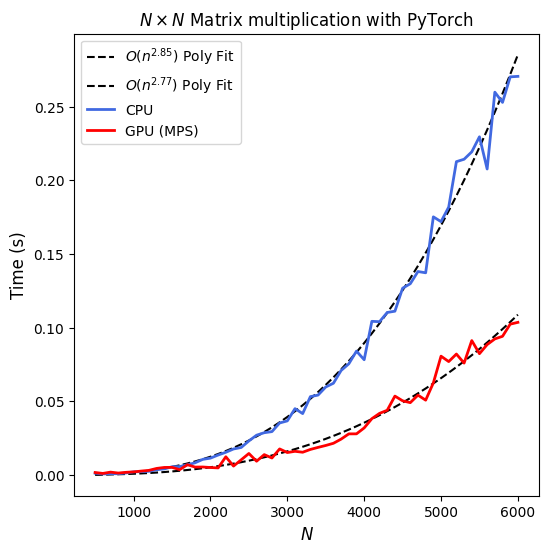

In [164]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_title(r"$N\times N$ Matrix multiplication with PyTorch")

ax.plot(x_val, [c_opt_cpu*np.pow(x, n_opt_cpu) for x in x_val], label=r"$O(n^{2.85})$ Poly Fit", color="black", ls="--", lw=1.5)
ax.plot(x_val, [c_opt_gpu*np.pow(x, n_opt_gpu) for x in x_val], label=r"$O(n^{2.77})$ Poly Fit", color="black", ls="--", lw=1.5)
ax.plot(x_val, cpu_times, label="CPU", color="royalblue", lw=2)
ax.plot(x_val, gpu_times, label="GPU (MPS)", color="red", lw=2)

ax.set_xlabel(r"$N$", fontsize=12)
ax.set_ylabel("Time (s)", fontsize=12)
ax.legend()